**Principal Component Analysis** (PCA) is fundamentally *a dimensionality reduction algorithm.*
- it can also be useful as a tool for visualization, 
- for noise filtering, 
- for feature extraction and engineering,etc.

A fast and flexible unsupervised method for dimensionality reduction in data.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

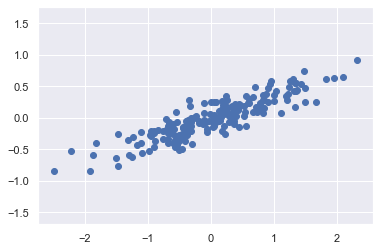

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

 - Rather than attempting to predict the y values from the x values, 
 - the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data
- and using those axes to describe the dataset.

In [6]:
#Using Scikit-Learn's PCA estimator:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


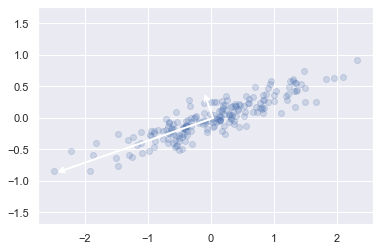

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

- These vectors represent the principal axes of the data, 
- and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data
    - more precisely, it is a measure of the variance of the data when projected onto that axis.
- The projection of each data point onto the principal axes are the "principal components" of the data.

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


- The transformed data has been reduced to a single dimension.

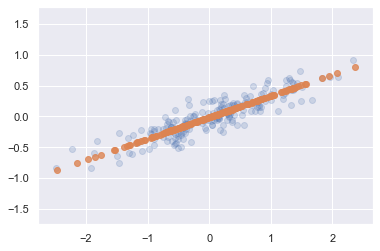

In [11]:
#inverse transform of this reduced data and plot it along with the original data:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

- This makes clear what a PCA dimensionality reduction means: 
    - the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. 
    - The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.